In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [61]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
df = pd.read_csv("arrests.csv")

In [63]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308876 entries, 0 to 5308875
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 769.6+ MB


In [65]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.308876e+06,5.308563e+06,5.299707e+06,5.308876e+06,5.308866e+06,5.308875e+06,5.308875e+06,5.308875e+06,5.308875e+06
mean,1.028799e+08,5.058053e+02,2.983706e+02,6.076179e+01,1.295535e+00,1.005355e+06,2.145870e+05,4.075546e+01,-7.392378e+01
std,5.857573e+07,2.650585e+02,1.805997e+02,3.435206e+01,9.416378e+00,2.008741e+04,1.603760e+05,4.335468e-01,7.249432e-02
min,9.926901e+06,0.000000e+00,1.010000e+02,1.000000e+00,0.000000e+00,9.133570e+05,1.211310e+05,4.049891e+01,-7.425494e+01
25%,6.143663e+07,2.690000e+02,1.260000e+02,3.300000e+01,0.000000e+00,9.932800e+05,1.868570e+05,4.067952e+01,-7.396743e+01
50%,8.567103e+07,5.110000e+02,3.410000e+02,6.000000e+01,0.000000e+00,1.004892e+06,2.092850e+05,4.074108e+01,-7.392548e+01
75%,1.500900e+08,7.480000e+02,3.480000e+02,8.400000e+01,0.000000e+00,1.015924e+06,2.366140e+05,4.081609e+01,-7.388556e+01
max,2.385139e+08,9.970000e+02,9.950000e+02,1.230000e+02,9.700000e+01,1.067302e+06,8.202360e+06,6.208307e+01,-7.368178e+01


In [66]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [67]:
df.isna().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  313
PD_DESC               9169
KY_CD                 9169
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           20254
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [68]:
df.shape

(5308876, 19)

In [69]:
df = df.dropna() # ya fue no perdemos nada de informacion

### Parece haber una tendencia a la baja

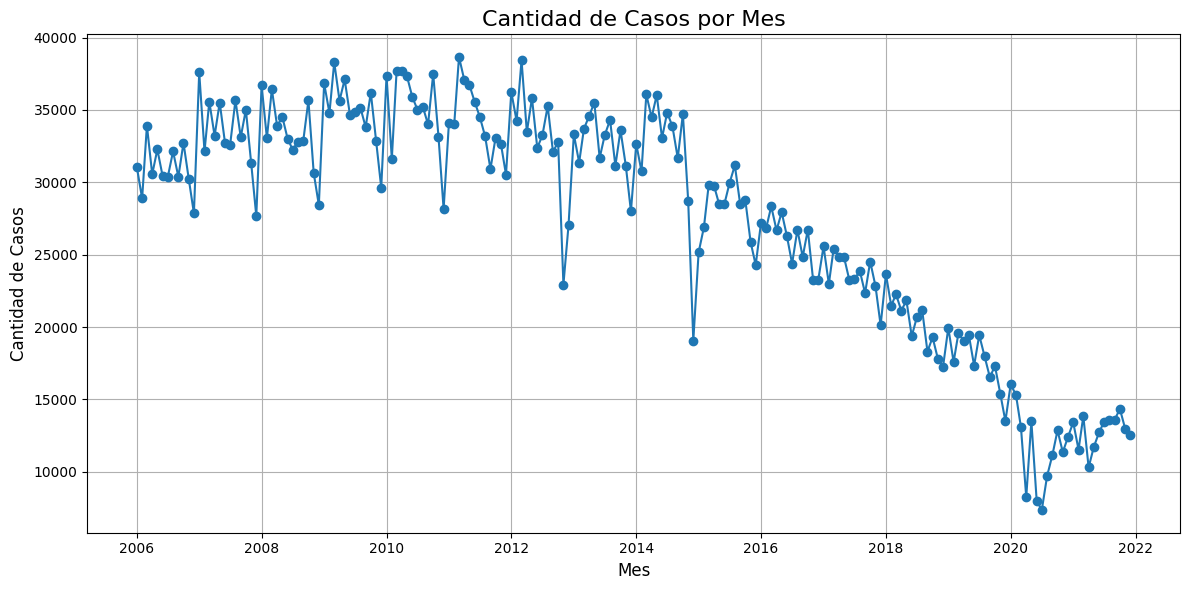

In [79]:
df_mes = df.groupby(df['ARREST_DATE'].dt.to_period('M')).size().reset_index(name='CASE_COUNT')

# Convierte la columna de periodos a datetime para ordenar correctamente
df_mes['ARREST_DATE'] = df_mes['ARREST_DATE'].dt.to_timestamp()

# Visualiza los datos en un gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mes['ARREST_DATE'], df_mes['CASE_COUNT'], marker='o', linestyle='-')
plt.title('Cantidad de Casos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_mes = df_mes.set_index('ARREST_DATE')
y = df_mes['CASE_COUNT'].resample('M').mean()

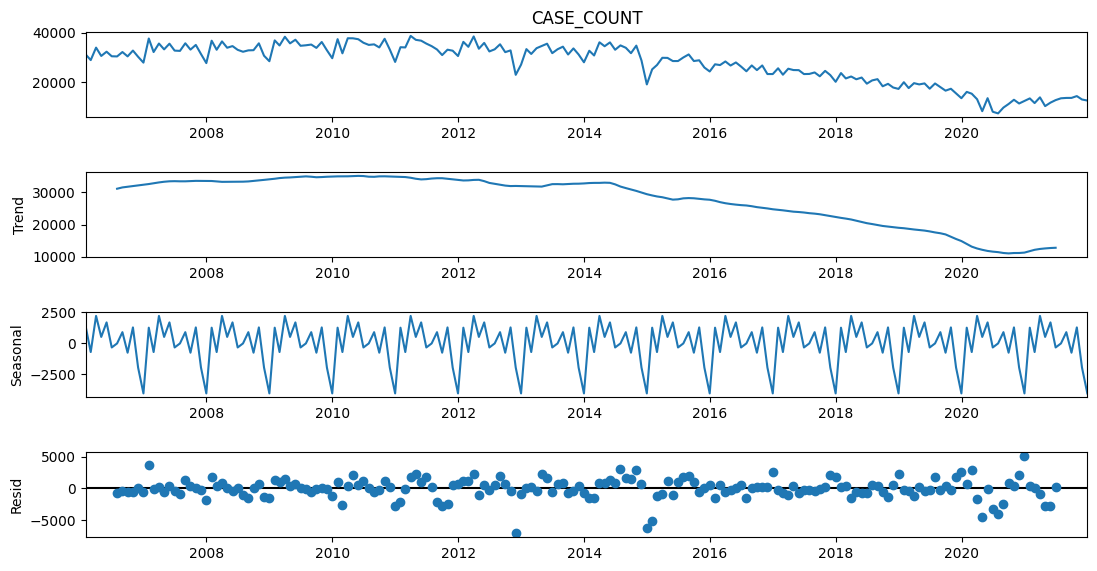

In [87]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 6)

#### Como hay una tendencia negativa, quizas es util usar la descomposicion multiplicativa. Pero, la variacion estacional parece mantenerse constante asi que nose

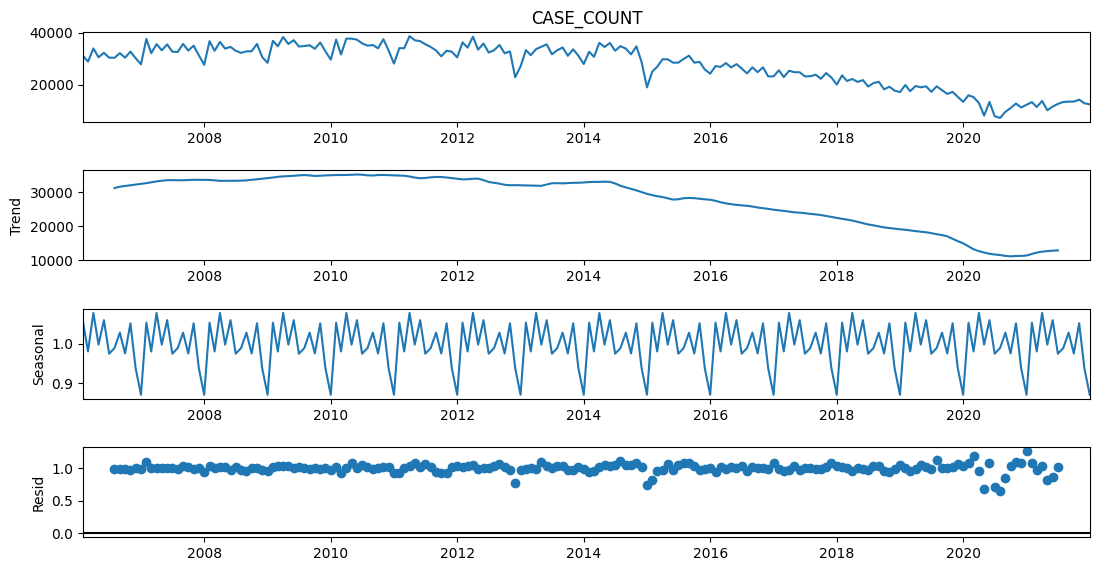

In [88]:
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(12, 6)

### Random Walk

In [94]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_mes, test_size=0.2, shuffle=False, random_state=42)

In [97]:
df_train.tail()

,CASE_COUNT
ARREST_DATE,
2018-05-01,21834
2018-06-01,19362
2018-07-01,20676
2018-08-01,21177
2018-09-01,18305


In [98]:
df_train['CASE_COUNT_SHIFT1'] = df_train.CASE_COUNT.shift()

df_train['CASE_COUNT_SHIFT1'].fillna(method='bfill', inplace=True)
df_train.head()

,CASE_COUNT,CASE_COUNT_SHIFT1
ARREST_DATE,,
2006-01-01,31055,31055.0
2006-02-01,28880,31055.0
2006-03-01,33918,28880.0
2006-04-01,30550,33918.0
2006-05-01,32269,30550.0


<Axes: xlabel='ARREST_DATE'>

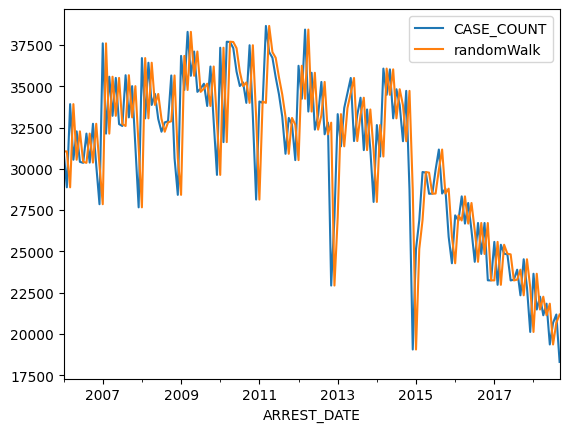

In [101]:
df_train['randomWalk'] = df_train.CASE_COUNT_SHIFT1
df_train.plot(kind='line', y=['CASE_COUNT', 'randomWalk'])

<Axes: xlabel='ARREST_DATE'>

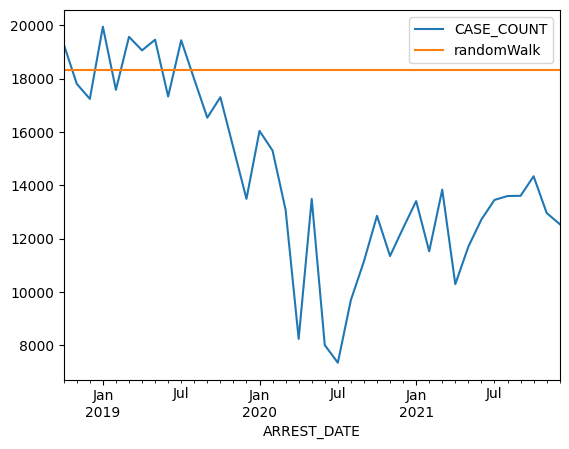

In [102]:
df_test['randomWalk'] = pd.Series(df_train['CASE_COUNT'][-1], index=df_test.index)
df_test.plot(kind='line', y=['CASE_COUNT', 'randomWalk'])

In [103]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [104]:
df_results = pd.DataFrame(columns = ["Model", "RMSE"])
df_results.loc[0, "Model"] = "Random Walk"
df_results.loc[0, "RMSE"] = RMSE(df_test.randomWalk, df_test.CASE_COUNT)
df_results

,Model,RMSE
0,Random Walk,5190.54509
